In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv('customer_behavior_dataset.csv')
df.head()

,customer_id,age,gender,region,signup_date,monthly_spend,tenure_months,churned
0,1,38,Female,East,2024-11-25,479.10,42,No
1,2,50,Male,North,2020-08-04,94.16,6,No
2,3,53,Male,West,2022-03-28,129.79,13,No
3,4,39,Female,West,2021-11-17,417.38,11,Yes
4,5,24,Male,South,2022-07-23,118.10,29,No


In [3]:
#Checking for missinf values
df.isnull().sum()

customer_id      0
age              0
gender           0
region           0
signup_date      0
monthly_spend    0
tenure_months    0
churned          0
dtype: int64

In [4]:
#Summary of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,400.0,NaN,NaN,NaN,200.5,115.614301,1.0,100.75,200.5,300.25,400.0
age,400.0,NaN,NaN,NaN,40.9425,13.928899,18.0,29.0,41.0,53.0,64.0
gender,400,2,Male,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,400,4,West,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
signup_date,400,350,2022-07-14,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_spend,400.0,NaN,NaN,NaN,264.3352,140.741096,20.31,141.0725,261.645,394.1475,499.49
tenure_months,400.0,NaN,NaN,NaN,28.985,17.120823,1.0,14.0,29.0,45.0,59.0
churned,400,2,No,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN


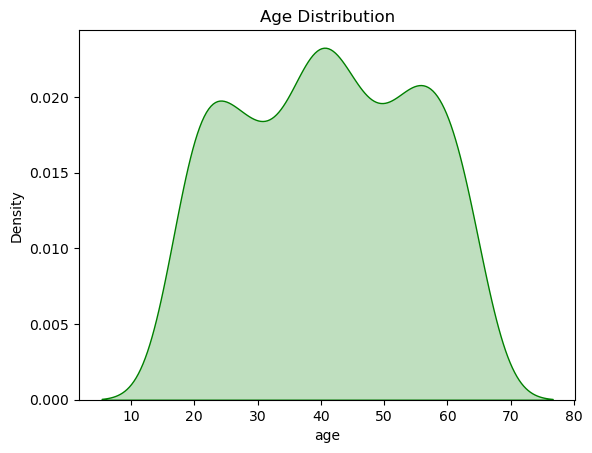

In [5]:
#Age distribution of the customers
sns.kdeplot(df['age'], fill=True, color='green')
plt.title('Age Distribution')
plt.show()

In [6]:
#Average Monthly Spend by Region
df.groupby('region')['monthly_spend'].mean().round(2)

region
East     261.06
North    260.27
South    247.35
West     285.68
Name: monthly_spend, dtype: float64

In [7]:
#Churn Rate by Region
df['churn']=df['churned'].map({'Yes':1, 'No':0})
churn_rate=df.groupby('region')['churn'].mean().round(4)*100
churn_rate

region
East     23.81
North    20.62
South    28.57
West     20.56
Name: churn, dtype: float64

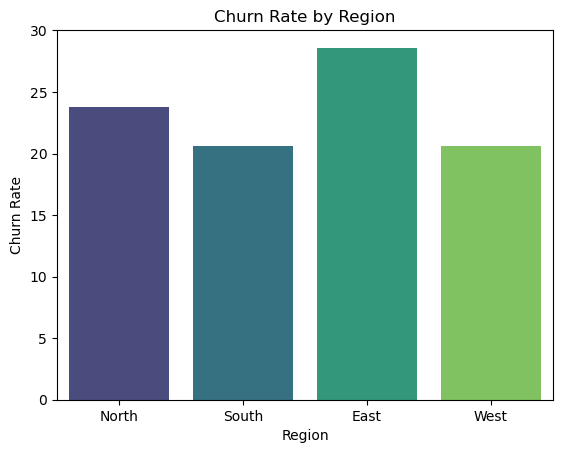

In [8]:
#Visualization of the Churn Rate by Region
data={
    'Region':['North', 'South', 'East', 'West'],
    'Churn_Rate':[23.8, 20.6, 28.6, 20.6]
}
data_p=pd.DataFrame(data)

sns.barplot(data_p, x='Region', y='Churn_Rate', palette='viridis')
plt.title('Churn Rate by Region')
plt.xlabel('Region')
plt.ylabel('Churn Rate')
plt.show()

In [9]:
df['lifetime_value']=df['monthly_spend'] * df['tenure_months']

In [10]:
#Customers with Tenure greater than 48 months
df[df['tenure_months']>48]

,customer_id,age,gender,region,signup_date,monthly_spend,tenure_months,churned,churn,lifetime_value
12,13,29,Female,South,2020-05-06,340.13,50,No,0,17006.50
15,16,63,Male,South,2020-10-20,32.29,54,No,0,1743.66
27,28,26,Female,South,2024-05-09,99.14,58,Yes,1,5750.12
37,38,31,Female,West,2023-09-12,136.10,50,Yes,1,6805.00
49,50,27,Male,East,2020-06-24,197.90,59,Yes,1,11676.10
...,...,...,...,...,...,...,...,...,...,...
381,382,57,Female,North,2021-07-29,183.94,57,No,0,10484.58
383,384,37,Male,West,2022-10-18,103.14,51,No,0,5260.14
387,388,20,Female,North,2023-06-22,66.22,57,No,0,3774.54
388,389,25,Female,West,2023-08-10,80.55,59,Yes,1,4752.45


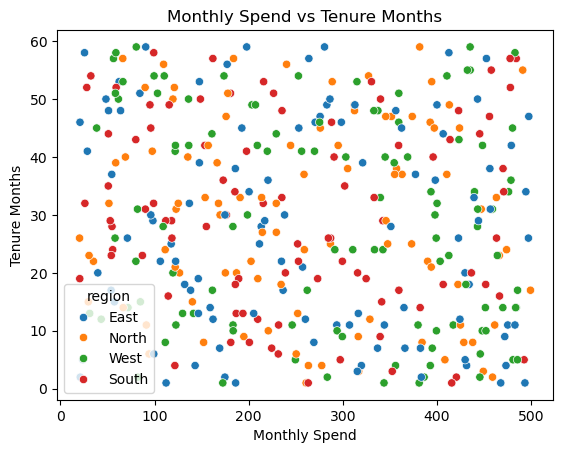

In [11]:
#Monthly Spend vs Tenure Months per region
sns.scatterplot(df, x='monthly_spend', y='tenure_months', hue='region')
plt.title('Monthly Spend vs Tenure Months')
plt.xlabel('Monthly Spend')
plt.ylabel('Tenure Months')
plt.show()

In [12]:
#Churn Rate of Gender
df.groupby('gender')['churn'].mean().round(4)*100

gender
Female    22.34
Male      24.14
Name: churn, dtype: float64

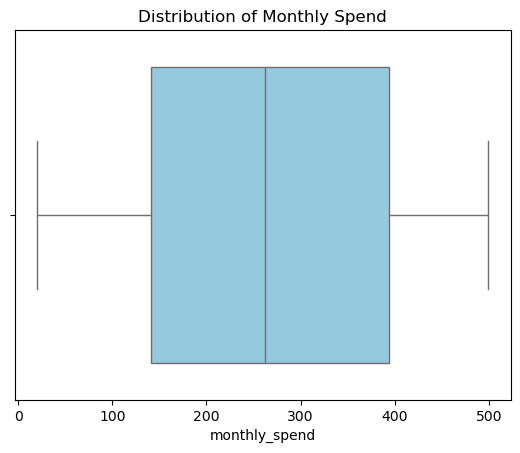

In [13]:
#Detecting Outliers in Monthly Spend column
sns.boxplot(x=df['monthly_spend'], color='skyblue', orient='h')
plt.title('Distribution of Monthly Spend')
plt.show()

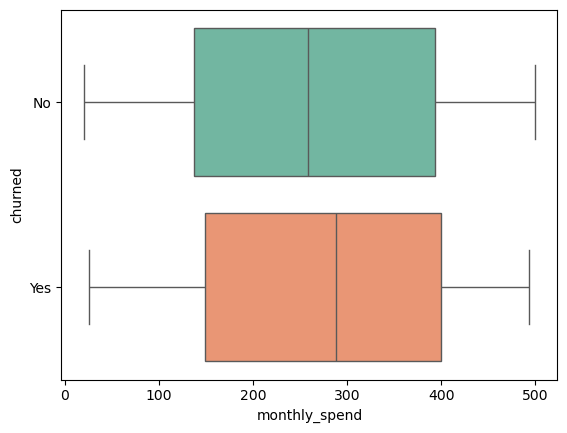

In [14]:
#
sns.boxplot(df, x='monthly_spend', y='churned', palette='Set2')
plt.show()

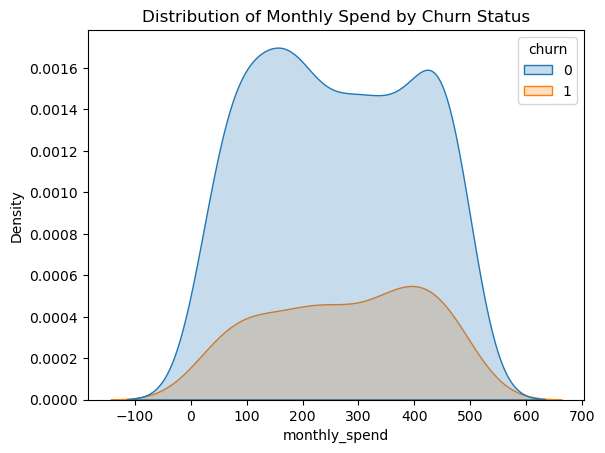

In [15]:
sns.kdeplot(df, x='monthly_spend', hue='churn', fill=True, color='viridis')
plt.title('Distribution of Monthly Spend by Churn Status')
plt.show()

In [16]:
correlation=df['monthly_spend'].corr(df['churn'])
print(f'The correlation is: {correlation}')

The correlation is: 0.043691706629180135


In [17]:
#Encoding the categorical variables
df_encoded=pd.get_dummies(df, columns=['gender','region'],  dtype=int)
df_encoded=df_encoded.drop(['churned','signup_date'], axis=1)
df_encoded.head()

,customer_id,age,monthly_spend,tenure_months,churn,lifetime_value,gender_Female,gender_Male,region_East,region_North,region_South,region_West
0,1,38,479.10,42,0,20122.20,1,0,1,0,0,0
1,2,50,94.16,6,0,564.96,0,1,0,1,0,0
2,3,53,129.79,13,0,1687.27,0,1,0,0,0,1
3,4,39,417.38,11,1,4591.18,1,0,0,0,0,1
4,5,24,118.10,29,0,3424.90,0,1,0,0,1,0


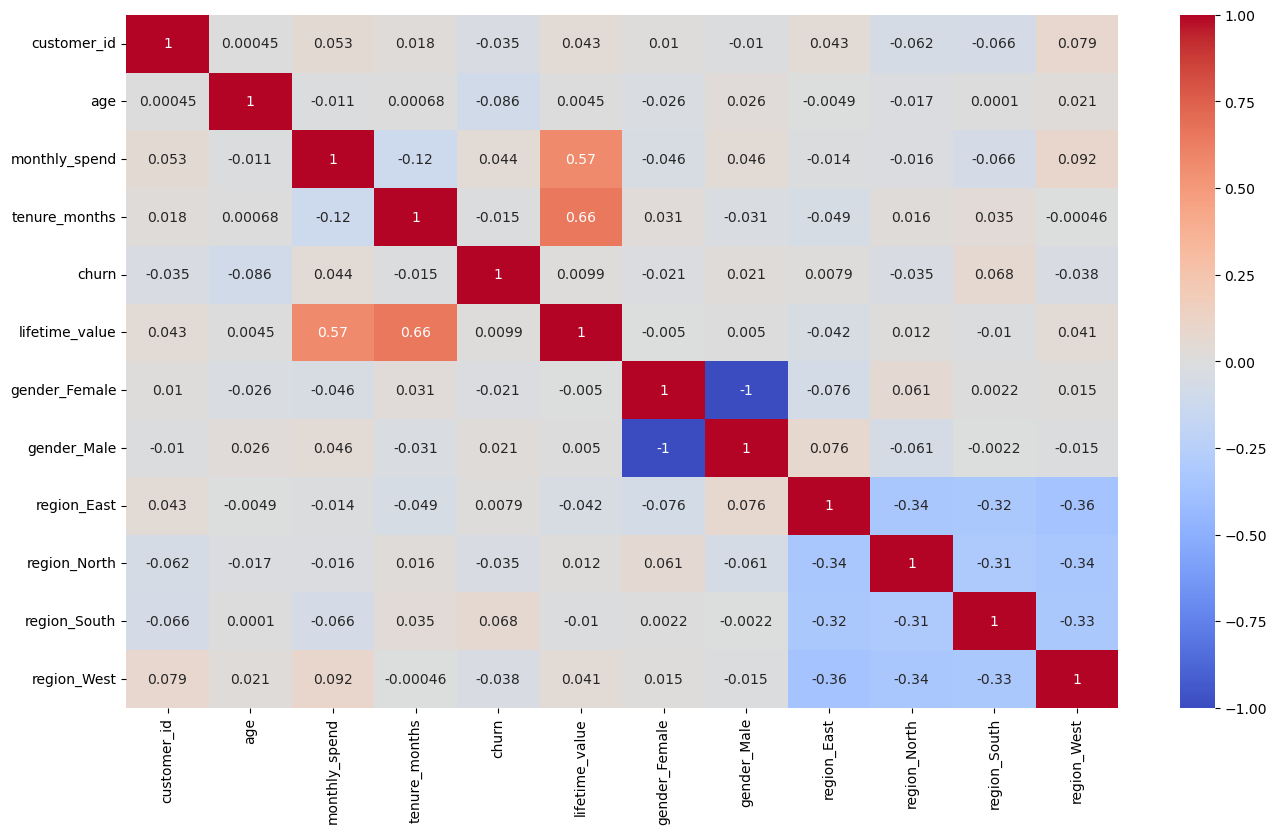

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
x=df_encoded.drop('churn', axis=1)
y=df_encoded['churn']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=3)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_sca=scaler.fit_transform(x_train)
x_test_sca=scaler.transform(x_test)

In [25]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_val_score

In [39]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_sca, y_train)
print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_smote))

Before SMOTE: Counter({0: 245, 1: 75})
After SMOTE: Counter({0: 245, 1: 245})


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(x_train_smote, y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
y_pred_train = model.predict(x_train_smote)
y_pred_test = model.predict(x_test_sca)

In [42]:
print(classification_report(y_train_smote, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60       245
           1       0.61      0.65      0.63       245

    accuracy                           0.62       490
   macro avg       0.62      0.62      0.62       490
weighted avg       0.62      0.62      0.62       490


              precision    recall  f1-score   support

           0       0.77      0.55      0.64        62
           1       0.22      0.44      0.30        18

    accuracy                           0.53        80
   macro avg       0.50      0.50      0.47        80
weighted avg       0.65      0.53      0.56        80

